# Simple Grid World - GYM

In [1]:
import numpy as np
from hiive.mdptoolbox import mdp
import matplotlib.pyplot as plt
import json
from gym.envs import toy_text

In [2]:
def get_TR_values(map_name="4x4"):
    env = toy_text.FrozenLakeEnv(map_name=map_name)
    num_states = env.observation_space.n
    num_actions = env.action_space.n

    P = np.zeros((num_actions, num_states, num_states))
    R = np.zeros((num_states, num_actions))
    for a in range(num_actions):
        for s in range(num_states):
            for values in env.P[s][a]:
                p, n, r, _ = values
                R[s, a] = r
                P[a, s, n] = p
                P[a, s, :] = P[a, s, :] / np.sum(P[a, s, :])

    return P, R

## Value Iteration

In [3]:
def value_iteration(P, R, iterations, gamma=0.95):
    vi = mdp.ValueIteration(P, R, gamma, max_iter=iterations)
    return vi.run()

def perform_value_iteration_exp_problem_size():
    runs = {}
    for problem_size in ["4x4", "8x8"]:
        print("Iteration:", problem_size)
        prob, reward = get_TR_values(problem_size)
        run = value_iteration(prob, reward, 20)
        runs[problem_size] = run
    with open("FrozLake-VI.json", "w+") as f:
        json.dump(runs, f, indent=4)


In [12]:
def value_iteration_experiments_gamma():
    runs = {}
    for gamma in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
        print("Gamma:", gamma)
        prob, reward = get_TR_values()
        run = value_iteration(prob, reward, 20, gamma=gamma)
        runs[gamma] = run
    with open("FrozLake-Gamma.json", "w+") as f:
        json.dump(runs, f, indent=4)

In [13]:
perform_value_iteration_exp_problem_size()

Iteration: 4x4
Iteration: 8x8


In [14]:
value_iteration_experiments_gamma()

Gamma: 0.4
Gamma: 0.45
Gamma: 0.5
Gamma: 0.55
Gamma: 0.6
Gamma: 0.65
Gamma: 0.7
Gamma: 0.75
Gamma: 0.8
Gamma: 0.85
Gamma: 0.9
Gamma: 0.95


In [15]:
policy, reward = get_TR_values()
vi = mdp.ValueIteration(policy, reward, max_iter=20, gamma=0.95)
vi.run()
vi_policy = vi.policy
vi_value = vi.V

## Policy Iteration

In [16]:
def policy_iteration(P, R, iterations, gamma=0.95):
    pi = mdp.PolicyIteration(P, R, gamma, max_iter=iterations)
    return pi.run()

def perform_policy_iteration_exp_problem_size():
    runs = {}
    for problem_size in ["4x4", "8x8"]:
        print("Iteration:", problem_size)
        prob, reward = get_TR_values(problem_size)
        run = policy_iteration(prob, reward, 100)
        runs[problem_size] = run
    with open("FrozenLake-PI.json", "w+") as f:
        json.dump(runs, f, indent=4)

In [17]:
def policy_iteration_experiments_gamma():
    runs = {}
    for gamma in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
        print("Gamma:", gamma)
        prob, reward = get_TR_values()
        run = policy_iteration(prob, reward, 100, gamma=gamma)
        runs[gamma] = run
    with open("FrozenLake-Gamma-PI.json", "w+") as f:
        json.dump(runs, f, indent=4)

In [18]:
perform_policy_iteration_exp_problem_size()

Iteration: 4x4
Iteration: 8x8


In [19]:
policy_iteration_experiments_gamma()

Gamma: 0.4
Gamma: 0.45
Gamma: 0.5
Gamma: 0.55
Gamma: 0.6
Gamma: 0.65
Gamma: 0.7
Gamma: 0.75
Gamma: 0.8
Gamma: 0.85
Gamma: 0.9
Gamma: 0.95


In [20]:
policy, reward = get_TR_values()
pi = mdp.PolicyIteration(policy, reward, max_iter=20, gamma=0.95)
pi.run()
pi_policy = pi.policy
pi_value = pi.V

## Q-Learning

In [56]:
def convert(o):
    if isinstance(o, np.int64): return int(o)  
    else: return o
    
def q_learning(P, R, iterations, gamma=0.95, alpha=0.1, epsilon_decay=0.99):
    ql = mdp.QLearning(P, R, gamma, n_iter=iterations, alpha=alpha, epsilon_decay=epsilon_decay)
    return ql.run()

def perform_q_learning_exp_problem_size():
    runs = {}
    for problem_size in ["4x4", "8x8"]:
        print("Iteration:", problem_size)
        prob, reward = get_TR_values(problem_size)
        run = q_learning(prob, reward, 10000)
        runs[problem_size] = run
    with open("FrozenLake-QL.json", "w+") as f:
        json.dump(runs, f, indent=4, default=convert)

In [57]:
def q_learning_experiments_gamma():
    runs = {}
    for gamma in [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
        print("Gamma:", gamma)
        prob, reward = get_TR_values()
        run = q_learning(prob, reward, 10000, gamma=gamma)
        runs[gamma] = run
    with open("FrozenLake-Gamma-QL.json", "w+") as f:
        json.dump(runs, f, indent=4, default=convert)

In [58]:
def q_learning_experiments_alpha():
    runs = {}
    for alpha in np.arange(0.1, 0.4, 0.1):
        print("Alpha:", alpha)
        prob, reward = get_TR_values()
        run = q_learning(prob, reward, 10000, alpha=alpha)
        runs[alpha] = run
    with open("FrozenLake-alpha-QL.json", "w+") as f:
        json.dump(runs, f, indent=4, default=convert)
        
def q_learning_experiments_epsilon_decay():
    runs = {}
    for epd in [0.99, 0.95, 0.8, 0.75]:
        print("Epsilon_decay:", epd)
        prob, reward = get_TR_values()
        run = q_learning(prob, reward, 10000, epsilon_decay=epd)
        runs[epd] = run
    with open("FrozenLake-epsilon-decay-QL.json", "w+") as f:
        json.dump(runs, f, indent=4, default=convert)

In [59]:
perform_q_learning_exp_problem_size()

Iteration: 4x4
Iteration: 8x8


In [60]:
q_learning_experiments_gamma()

Gamma: 0.4
Gamma: 0.45
Gamma: 0.5
Gamma: 0.55
Gamma: 0.6
Gamma: 0.65
Gamma: 0.7
Gamma: 0.75
Gamma: 0.8
Gamma: 0.85
Gamma: 0.9
Gamma: 0.95


In [32]:
q_learning_experiments_alpha()
q_learning_experiments_epsilon_decay()

Alpha: 0.1
Alpha: 0.2
Alpha: 0.30000000000000004
Alpha: 0.4
Epsilon_decay: 0.99
Epsilon_decay: 0.95
Epsilon_decay: 0.8
Epsilon_decay: 0.75


In [33]:
policy, reward = get_TR_values()
ql = mdp.QLearning(policy, reward, n_iter=10000, gamma=0.95)
ql.run()
ql_policy = ql.policy
ql_value = ql.V

## Visualization

#### Value Iteration - Metrics

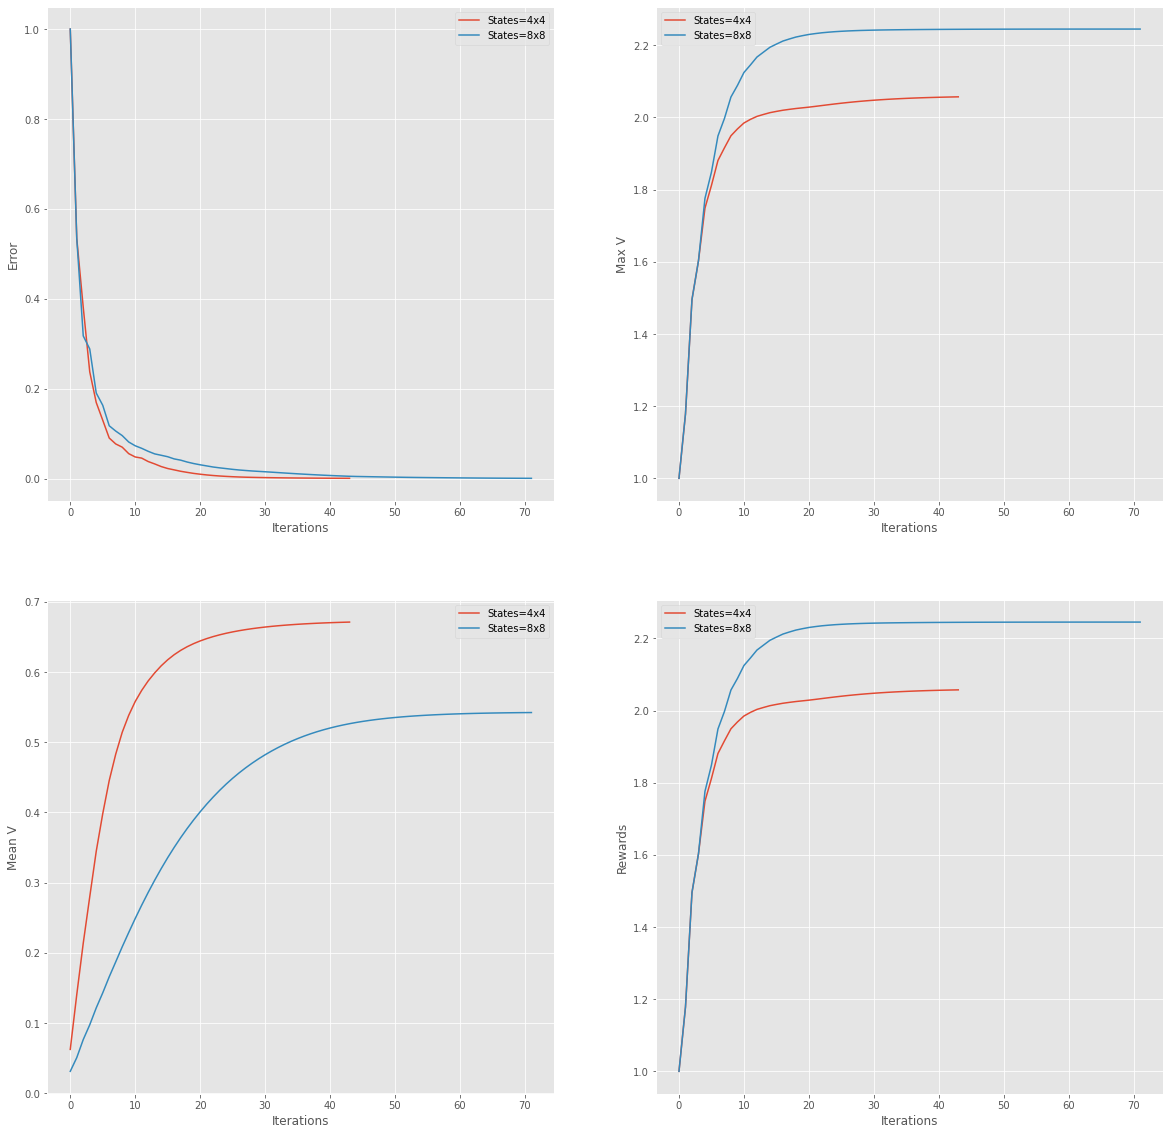

In [36]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
numbering = ['a', 'b', 'c', 'd', 'e', 'f']
with open("FrozLake-VI.json") as f:
    vl_val = json.load(f)
    iterations = []
    time = []
    rewards = {}
    meanvs = {}
    maxvs = {}
    errors = {}
    for prob_size, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        time.append(values[-1]['Time'])
        
        reward = []
        meanv = []
        maxv = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            meanv.append(value['Mean V'])
            maxv.append(value['Max V'])
            error.append(value['Error'])

        rewards[prob_size] = reward
        meanvs[prob_size] = meanv
        maxvs[prob_size] = maxv
        errors[prob_size] = error
    
    for problem_size in ["4x4", "8x8"]:
        problem_size = str(problem_size)
        label = f"States={problem_size}"
        ax[0][0].plot(errors[problem_size], label=label)
        ax[0][1].plot(maxvs[problem_size], label=label)
        ax[1][0].plot(meanvs[problem_size], label=label)
        ax[1][1].plot(rewards[problem_size], label=label)
        
        ax[0][0].set_xlabel('Iterations')
        ax[0][0].set_ylabel('Error')
        ax[0][1].set_xlabel('Iterations')
        ax[0][1].set_ylabel('Max V')
        ax[1][0].set_xlabel('Iterations')
        ax[1][0].set_ylabel('Mean V')
        ax[1][1].set_xlabel('Iterations')
        ax[1][1].set_ylabel('Rewards')
        
        
    
    for i in range(0, 2):
        for j in range(0, 2):
            ax[i][j].legend(loc="best")

#### Policy Iteration - Metrics

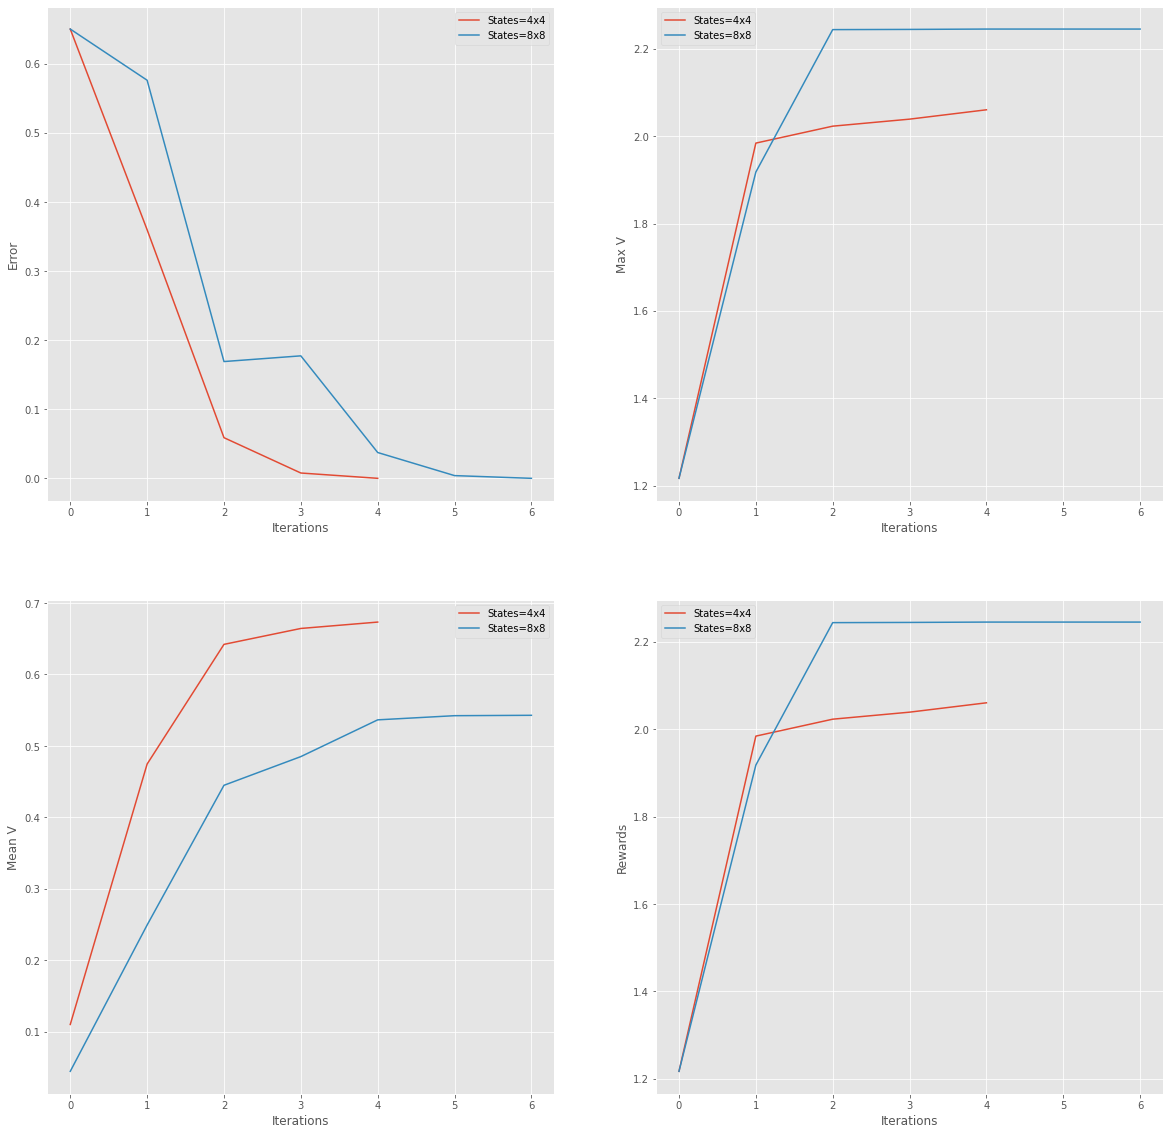

In [38]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
numbering = ['a', 'b', 'c', 'd', 'e', 'f']
with open("FrozenLake-PI.json") as f:
    vl_val = json.load(f)
    iterations = []
    time = []
    rewards = {}
    meanvs = {}
    maxvs = {}
    errors = {}
    for prob_size, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        time.append(values[-1]['Time'])
        
        reward = []
        meanv = []
        maxv = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            meanv.append(value['Mean V'])
            maxv.append(value['Max V'])
            error.append(value['Error'])

        rewards[prob_size] = reward
        meanvs[prob_size] = meanv
        maxvs[prob_size] = maxv
        errors[prob_size] = error
    
    for problem_size in ["4x4", "8x8"]:
        problem_size = str(problem_size)
        label = f"States={problem_size}"
        ax[0][0].plot(errors[problem_size], label=label)
        ax[0][1].plot(maxvs[problem_size], label=label)
        ax[1][0].plot(meanvs[problem_size], label=label)
        ax[1][1].plot(rewards[problem_size], label=label)
        
        ax[0][0].set_xlabel('Iterations')
        ax[0][0].set_ylabel('Error')
        ax[0][1].set_xlabel('Iterations')
        ax[0][1].set_ylabel('Max V')
        ax[1][0].set_xlabel('Iterations')
        ax[1][0].set_ylabel('Mean V')
        ax[1][1].set_xlabel('Iterations')
        ax[1][1].set_ylabel('Rewards')
        
        
    
    for i in range(0, 2):
        for j in range(0, 2):
            ax[i][j].legend(loc="best")

#### Q-Learning - Metrics

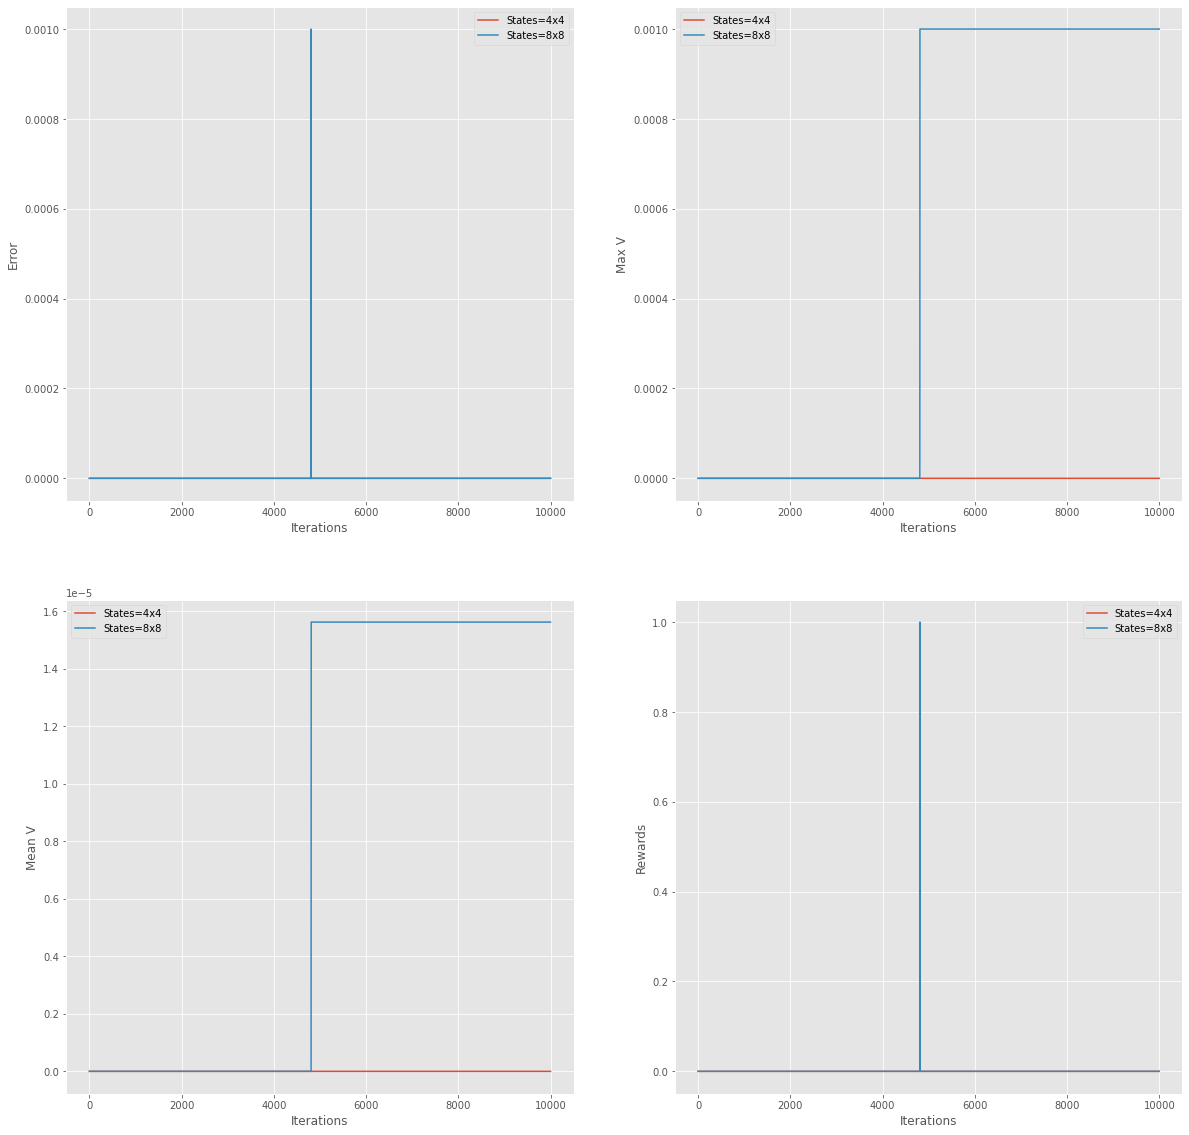

In [61]:
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
numbering = ['a', 'b', 'c', 'd', 'e', 'f']
with open("FrozenLake-QL.json") as f:
    vl_val = json.load(f)
    iterations = []
    time = []
    rewards = {}
    meanvs = {}
    maxvs = {}
    errors = {}
    for prob_size, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        time.append(values[-1]['Time'])
        
        reward = []
        meanv = []
        maxv = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            meanv.append(value['Mean V'])
            maxv.append(value['Max V'])
            error.append(value['Error'])

        rewards[prob_size] = reward
        meanvs[prob_size] = meanv
        maxvs[prob_size] = maxv
        errors[prob_size] = error
    
    for problem_size in ["4x4", "8x8"]:
        problem_size = str(problem_size)
        label = f"States={problem_size}"
        ax[0][0].plot(errors[problem_size], label=label)
        ax[0][1].plot(maxvs[problem_size], label=label)
        ax[1][0].plot(meanvs[problem_size], label=label)
        ax[1][1].plot(rewards[problem_size], label=label)
        
        ax[0][0].set_xlabel('Iterations')
        ax[0][0].set_ylabel('Error')
        ax[0][1].set_xlabel('Iterations')
        ax[0][1].set_ylabel('Max V')
        ax[1][0].set_xlabel('Iterations')
        ax[1][0].set_ylabel('Mean V')
        ax[1][1].set_xlabel('Iterations')
        ax[1][1].set_ylabel('Rewards')
        
        
    
    for i in range(0, 2):
        for j in range(0, 2):
            ax[i][j].legend(loc="best")

## Gamma
### Value Iteration

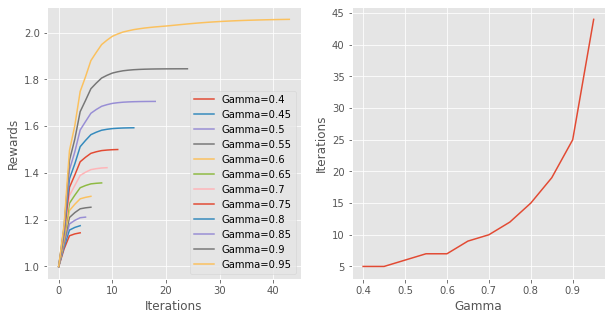

In [44]:
plt.style.use('ggplot')

gammas = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("FrozLake-Gamma.json") as f:
    vl_val = json.load(f)
    rewards = {}
    iterations = []
    for gamma, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        reward = []
        for value in values:
            reward.append(value['Reward'])
        rewards[gamma] = reward
    
    for problem_size in gammas:
        problem_size = str(problem_size)
        label = f"Gamma={problem_size}"
        ax[0].plot(rewards[problem_size], label=label)
    ax[1].plot(gammas, iterations)
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Rewards')
    ax[1].set_xlabel('Gamma')
    ax[1].set_ylabel('Iterations')

    ax[0].legend(loc="best")

### Policy Iteration

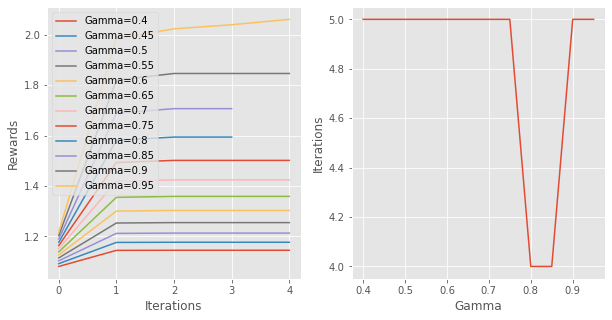

In [45]:
plt.style.use('ggplot')

gammas = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("FrozenLake-Gamma-PI.json") as f:
    vl_val = json.load(f)
    rewards = {}
    iterations = []
    for gamma, values in vl_val.items():
        iterations.append(values[-1]['Iteration'])
        reward = []
        for value in values:
            reward.append(value['Reward'])
        rewards[gamma] = reward
    
    for problem_size in gammas:
        problem_size = str(problem_size)
        label = f"Gamma={problem_size}"
        ax[0].plot(rewards[problem_size], label=label)
    ax[1].plot(gammas, iterations)
    ax[0].set_xlabel('Iterations')
    ax[0].set_ylabel('Rewards')
    ax[1].set_xlabel('Gamma')
    ax[1].set_ylabel('Iterations')

    ax[0].legend(loc="best")

### QLearning

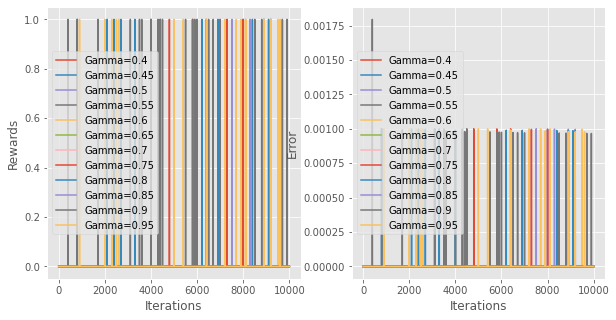

In [49]:
plt.style.use('ggplot')

gammas = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("FrozenLake-Gamma-QL.json") as f:
    vl_val = json.load(f)
    rewards = {}
    error = {}
    for gamma, values in vl_val.items():
        if gamma == '1.0':
            break
        
        reward = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            error.append(value['Error'])
        rewards[gamma] = reward
        errors[gamma] = error
        
    for problem_size in gammas:
        problem_size = str(problem_size)
        label = f"Gamma={problem_size}"
        ax[0].plot(rewards[problem_size], label=label)
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('Rewards')
        ax[1].plot(errors[problem_size], label=label)
        ax[1].set_xlabel('Iterations')
        ax[1].set_ylabel('Error')
        
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

## Q-Learning - Alpha

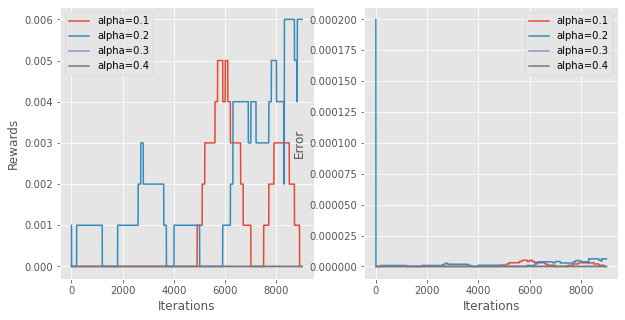

In [62]:
plt.style.use('ggplot')

alphas = np.arange(0.1, 0.4, 0.1)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("FrozenLake-alpha-QL.json") as f:
    vl_val = json.load(f)
    rewards = {}
    error = {}
    for alpha, values in vl_val.items():
        
        reward = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            error.append(value['Error'])
        rewards[alpha] = reward
        errors[alpha] = error
        
    for problem_size in alphas:
        problem_size = str(problem_size)
        label = f"alpha={round(eval(problem_size), 2)}"
        ax[0].plot(np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('Rewards')
        ax[1].plot(np.convolve(errors[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[1].set_xlabel('Iterations')
        ax[1].set_ylabel('Error')
        
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

### QLearning -  Epsilon Decay

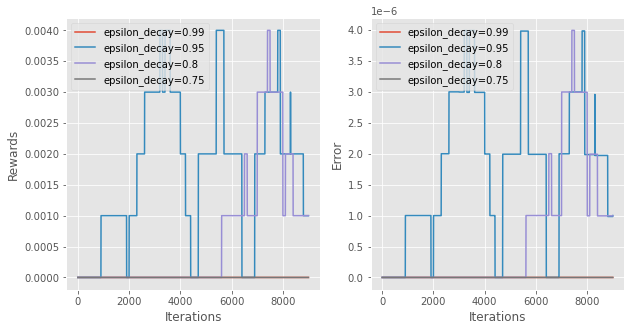

In [63]:
plt.style.use('ggplot')

epds = [0.99, 0.95, 0.8, 0.75]
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
with open("FrozenLake-epsilon-decay-QL.json") as f:
    vl_val = json.load(f)
    rewards = {}
    error = {}
    for epd, values in vl_val.items():
        
        reward = []
        error = []
        for value in values:
            reward.append(value['Reward'])
            error.append(value['Error'])
        rewards[epd] = reward
        errors[epd] = error
        
    for problem_size in epds:
        problem_size = str(problem_size)
        label = f"epsilon_decay={round(eval(problem_size), 2)}"
        ax[0].plot(np.convolve(rewards[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[0].set_xlabel('Iterations')
        ax[0].set_ylabel('Rewards')
        ax[1].plot(np.convolve(errors[problem_size], np.ones((1000,))/1000, mode='valid'), label=label)
        ax[1].set_xlabel('Iterations')
        ax[1].set_ylabel('Error')
        
    ax[0].legend(loc="best")
    ax[1].legend(loc="best")

Text(0.5, 1.0, 'Q Learning')

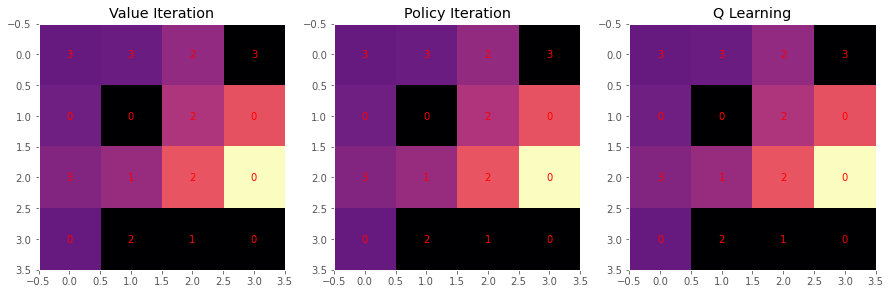

In [76]:
width = 10
fix, ax = plt.subplots(ncols=3, figsize=(15, 5))
vimat = [[vi_value[i*4+j] for i in range(4)] for j in range(4)]
vip = [[vi_policy[i*4+j] for i in range(4)] for j in range(4)]

cax = ax[0].imshow(vimat, cmap='magma');
cbar = fig.colorbar(cax)
for x in range(len(vimat)):
    for y in range(len(vimat[0])):
        ax[0].text(x, y, vip[x][y], color='red',
                horizontalalignment='center', verticalalignment='center')
ax[0].grid(False)
ax[0].set_title("Value Iteration")

pimat = [[pi_value[i*4+j] for i in range(4)] for j in range(4)]
pip = [[pi_policy[i*4+j] for i in range(4)] for j in range(4)]

cax = ax[1].imshow(pimat, cmap='magma');
cbar = fig.colorbar(cax)
for x in range(len(pimat)):
    for y in range(len(pimat[0])):
        ax[1].text(x, y, pip[x][y], color='red',
                horizontalalignment='center', verticalalignment='center')
ax[1].grid(False)
ax[1].set_title("Policy Iteration")

qlmat = [[vi_value[i*4+j] for i in range(4)] for j in range(4)]
qlip = [[vi_policy[i*4+j] for i in range(4)] for j in range(4)]

cax = ax[2].imshow(qlmat, cmap='magma');
cbar = fig.colorbar(cax)
for x in range(len(qlmat)):
    for y in range(len(qlmat[0])):
        ax[2].text(x, y, qlip[x][y], color='red',
                horizontalalignment='center', verticalalignment='center')
ax[2].grid(False)
ax[2].set_title("Q Learning")